In [54]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import spearmanr
import numpy as np


## Loading the PAS data

In [36]:
data = pd.read_csv(".\data\PAS_data.csv")

## Distribution of varaibles

In [50]:
data.shape

(63662, 107)

In [42]:
simpleColumns = [
    "NQ135BD",
    "Q1",
    "Q3H",
    "Q13",
    "Q15",
    "NQ21",
    "Q39A_2",
    "A120",
    "Q62B",
    "Q62E",
    "Q79C"
]

data_simple = data[simpleColumns]


In [39]:
distributed_counts = data_simple.apply(pd.value_counts)

C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_32640\397872741.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  distributed_counts = data_simple.apply(pd.value_counts)


In [44]:
# experiment: ok I will try working with that data, just for the simplicity sake, we can try replacing values based on profile of a person

value_to_drop = -1

# Create a boolean mask where True indicates rows that should be dropped
mask = data_simple.apply(lambda row: value_to_drop in row.values, axis=1)

# Drop rows where the mask is True
df_cleaned = data_simple[~mask]
df_cleaned.shape

(37961, 11)

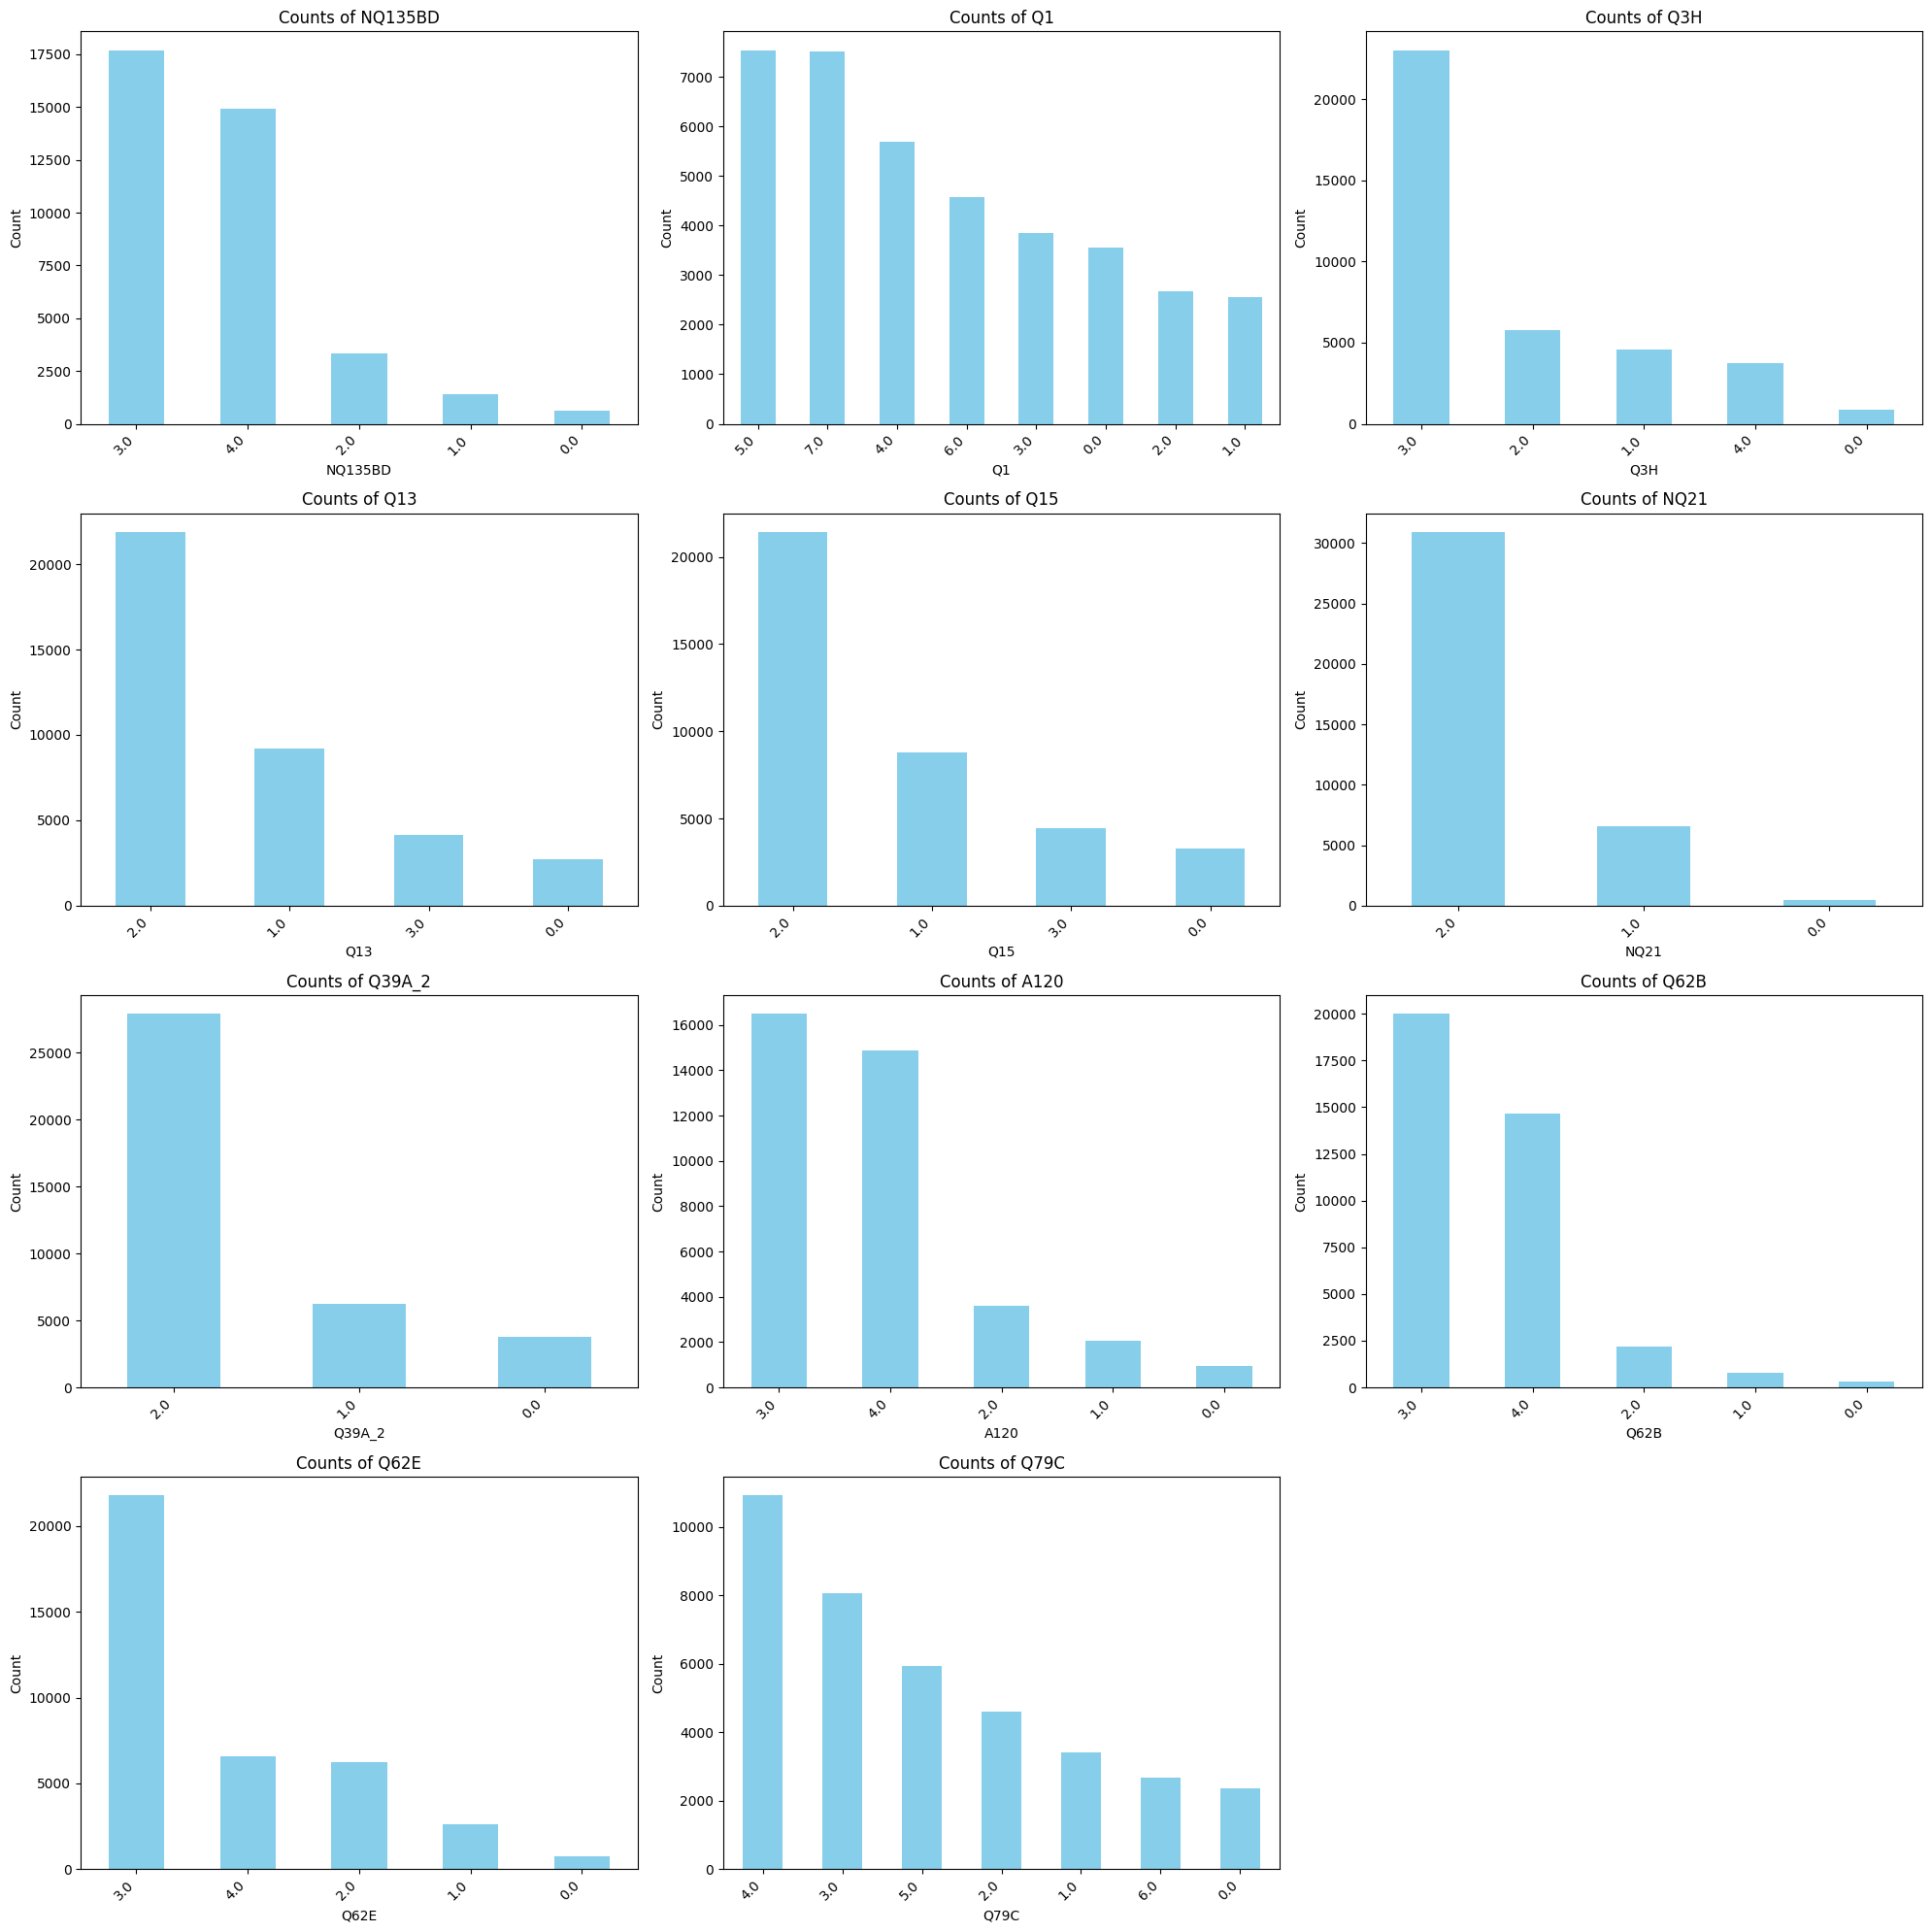

In [49]:
def plot_counts_subplots(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows for subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        counts = df[column].value_counts()
        counts.plot(kind='bar', color='skyblue', ax=axes[i])
        axes[i].set_title(f'Counts of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].set_xticklabels(counts.index, rotation=45, ha='right')

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Use the function to plot counts for the columns in simpleColumns
plot_counts_subplots(df_cleaned, simpleColumns)

## Getting the model

In [60]:
# checking for multicolinearity for ordinal values

preds = [
    "Q1",
    "Q3H",
    "Q13",
    "Q15",
    "NQ21",
    "Q39A_2",
    "A120",
    "Q62B",
    "Q62E",
    "Q79C"
]

multicolinearityIndex = dict()
multicolinearityDetected = dict()

for i in preds:
    for j in preds:
        if j == i:
            pass
        else: 
            corr, pval = spearmanr(df_cleaned[i], df_cleaned[j])
            index = f'{i} : {j}'
            result = f'correlation : {corr}, pval : {pval}'

            if np.absolute(corr) > 0.8:
                multicolinearityDetected[index] = result
            multicolinearityIndex[index] = result

multicolinearityDetected

{}

In [61]:
### checking for Proportional odds: done in R as the statistical test is only available there

df_cleaned.to_csv('exp.csv', index=False)

In [ ]:
# gettign the model 


mod_prob = OrderedModel(df_cleaned['NQ135BD'],
                        df_cleaned[preds],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()